In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Convección no lineal en 2D, ecuación de Burgers invísida

En 2D, la ecuación de convección cambia debido a la presencia de dos velocidades distintas, $u$ y $v$, a lo largo de las 2 dimensiones espaciales. Por lo tanto la ecuación que debemos de resolver es

$$\frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\vec{\nabla}\right)\vec{u} = 0$$

Escrito explícitamente las ecuaciones son

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$


Por lo tanto ahora tenemos que discretizar ambas ecuaciones utilizando el método de diferencias finitas.

Por lo tanto la primera ecuación se escribe:
$$
\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n} \frac{u_{(i,j)}^{n}-u_{(i-1,j)}^{n}}{\Delta x} +  v_{(i,j)}^{n}\frac{u_{(i,j)}^{n}-u_{(i,j-1)}^{n}}{\Delta y}=0
$$
Y la segunda
$$
\frac{v_{(i,j)}^{n+1}-v_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n} \frac{v_{(i,j)}^{n}-v_{(i-1,j)}^{n}}{\Delta x} +  v_{(i,j)}^{n}\frac{v_{(i,j)}^{n}-v_{(i,j-1)}^{n}}{\Delta y}=0
$$

De donde podemos despejar los nuevos valores de $u$ y $v$ en función de los valores que conocemos, en el tiempo n.

$$
u_{(i,j)}^{n+1} = u_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^{n} \left( u_{(i,j)}^{n}-u_{(i-1,j)}^{n} \right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^{n} \left( u_{(i,j)}^{n}-u_{(i-1,j)}^{n} \right)
$$
$$
v_{(i,j)}^{n+1} = v_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^{n} \left(v_{(i,j)}^{n}-v_{(i-1,j)}^{n} \right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^{n} \left(v_{(i,j)}^{n}-v_{(i-1,j)}^{n} \right)
$$

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

A continuación ponemos las condiciones iniciales como funciones escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.5,1)\times(0.5,1)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$
$$
v_0(x) = 
    \begin{cases} 
    3 & : (x,y) \in (0.7,1.3)\times(0.7,1.3)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$


Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

$$v = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

In [7]:
def avance_en_tiempo(nt, nx, ny, dx, dy, sigma):
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    t = 0
    un = ones((nx,ny))
    vn = ones((nx,ny))
    
    u = ones((nx,ny))
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    v = ones((nx,ny))
    v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3
    
    for n in range(nt):
        V=0
        for i in range(nx):
            for j in range(ny):
                if V < u[i][j]: V=u[j][j]
                if V < v[i][j]: V=v[j][j]

        dt = sigma*min(dx,dy)/V
        t = t+dt
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        vn = v.copy()
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])\
                        -dt/dy*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])
        v[1:-1,1:-1] = vn[1:-1,1:-1]-dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
                        -dt/dy*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
        v[0,:]=1
        v[-1,:]=1
        v[:,0]=1
        v[:,-1]=1
        
    return u, v, t

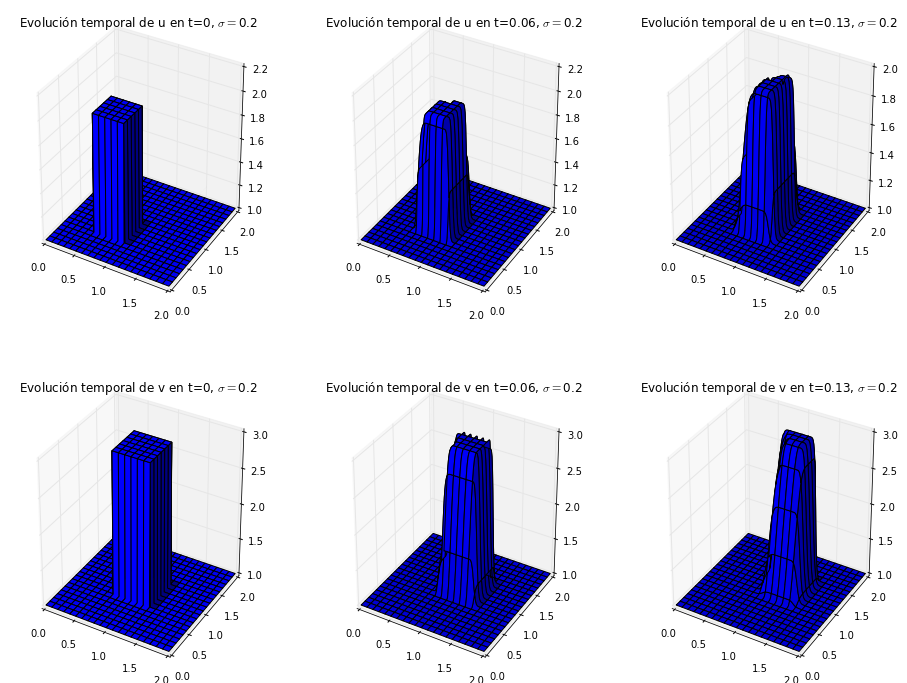

In [9]:
L = 2.

nx = 201
ny = 201
dx = 2./(nx-1)
dy = 2./(ny-1)

x = linspace(0,L,nx)
y = linspace(0,L,ny)
                  
fig = figure(figsize=(16, 12), dpi=200)
ax = fig.add_subplot(231, projection='3d')
bx = fig.add_subplot(232, projection='3d')
cx = fig.add_subplot(233, projection='3d')
ex = fig.add_subplot(234, projection='3d')
fx = fig.add_subplot(235, projection='3d')
gx = fig.add_subplot(236, projection='3d')
X, Y = meshgrid(x,y)  

u = ones((ny,nx))
u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

v= ones((ny,nx))
v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3

sigma = 0.2

ax.plot_surface(X, Y, u[:])
ex.plot_surface(X, Y, v[:])

U1, V1, t1 = avance_en_tiempo(100, nx, ny, dx, dy, sigma)
bx.plot_surface(X, Y, U1[:])
fx.plot_surface(X, Y, V1[:])

U2,V2,t2 = avance_en_tiempo(200, nx, ny, dx, dy, sigma)
cx.plot_surface(X, Y, U2[:])
gx.plot_surface(X, Y, V2[:])

ax.set_title(u"Evolución temporal de u en t=0, $\sigma = $"+str(sigma))
bx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
cx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))
ex.set_title(u"Evolución temporal de v en t=0, $\sigma = $"+str(sigma))
fx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
gx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))